In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Set the Seaborn style
sns.set_style("whitegrid")  # Options include: darkgrid, whitegrid, dark, white, and ticks

# Set the context for plotting
sns.set_context("paper")  # Options include: paper, notebook, talk, and poster

# Optionally, set the color palette
sns.set_palette("colorblind")  # Options include: deep, muted, bright, pastel, dark, colorblind

# Set Matplotlib defaults
plt.rcParams['figure.figsize'] = [10, 6]  # Default figure size (width, height)
plt.rcParams['axes.titlesize'] = 12  # Default title size
plt.rcParams['axes.labelsize'] = 10  # Default label size for x and y axes
plt.rcParams['xtick.labelsize'] = 8  # Default x-tick label size
plt.rcParams['ytick.labelsize'] = 8  # Default y-tick label size

In [ ]:
def add_value_labels(ax, total, spacing=5, rotation=0, fontsize=8.5):
    """
    Add labels to the end of each bar in a bar chart.
    """
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        percentage = '{:.1f}%'.format(100 * y_value / total)
        label = f"{int(y_value)} ({percentage})"
        # label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, spacing),
            textcoords="offset points",
            ha='center',
            va='bottom',
            rotation=rotation,
            fontsize=fontsize)

In [ ]:
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label[:15] + '\n' + label[15:] if len(label) > 15 else label for label in labels]

In [ ]:
# Load dataset

data = pd.read_csv("/content/iom_Questionnaire_v2analysis.csv")  # or pd.read_excel for Excel files


In [ ]:
data.head()

IndexError: ignored

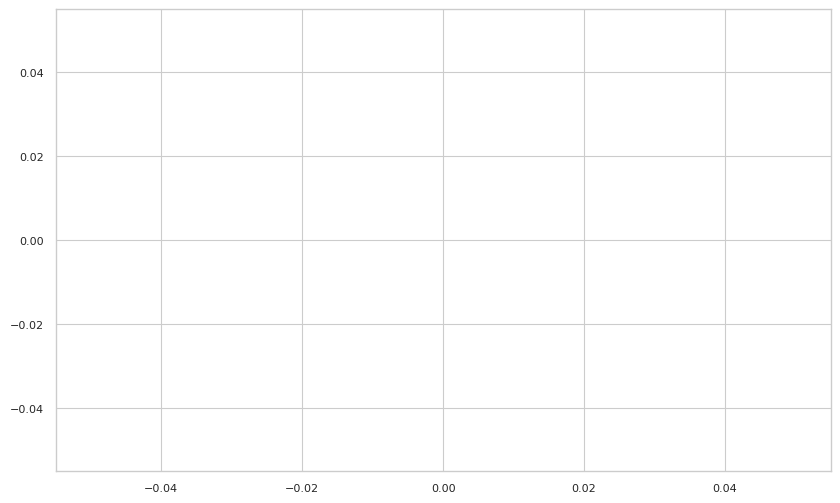

In [ ]:

age_counts = data.groupby('Gender')["Age"].count()
total_count = age_counts.sum()
percentages = 100 * age_counts / total_count

data.groupby('Gender')["Age"].count().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

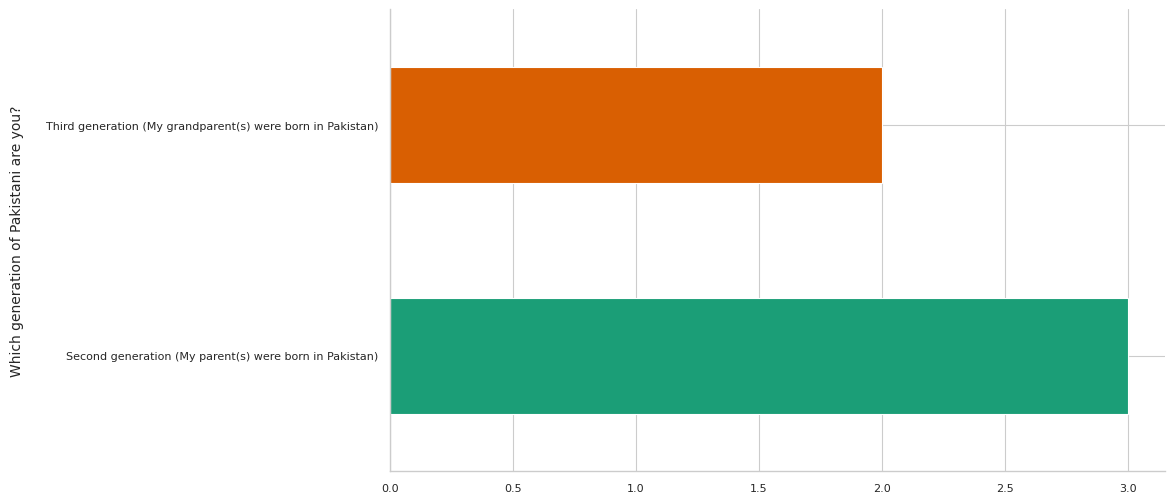

In [ ]:

_df_3.groupby('Which generation of Pakistani are you?\n')["Professions"].count().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

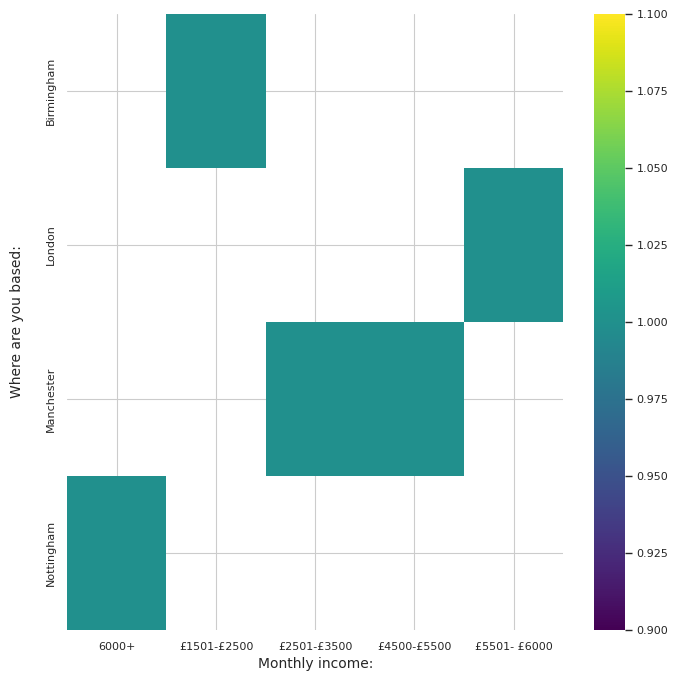

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Where are you based:\n'].value_counts()
    for x_label, grp in _df_19.groupby('Monthly income:\n')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly income:\n')
_ = plt.ylabel('Where are you based:\n')

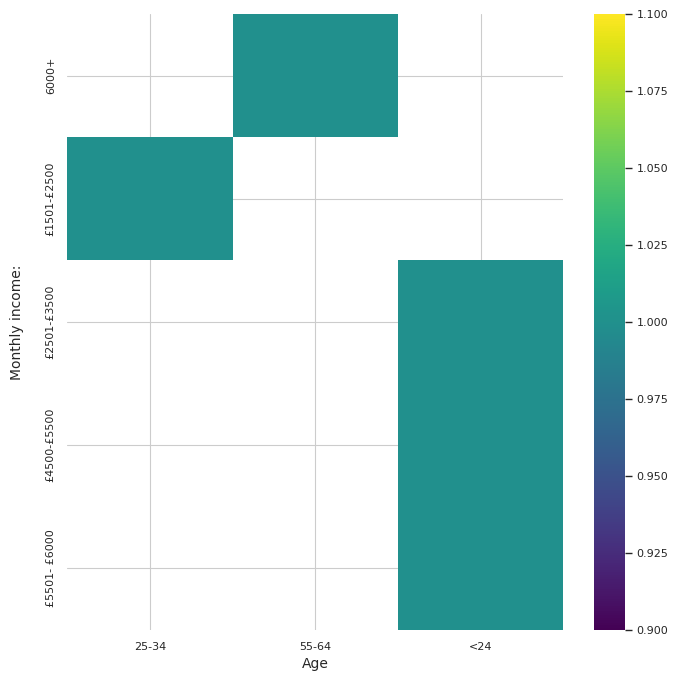

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Monthly income:\n'].value_counts()
    for x_label, grp in _df_18.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('Monthly income:\n')

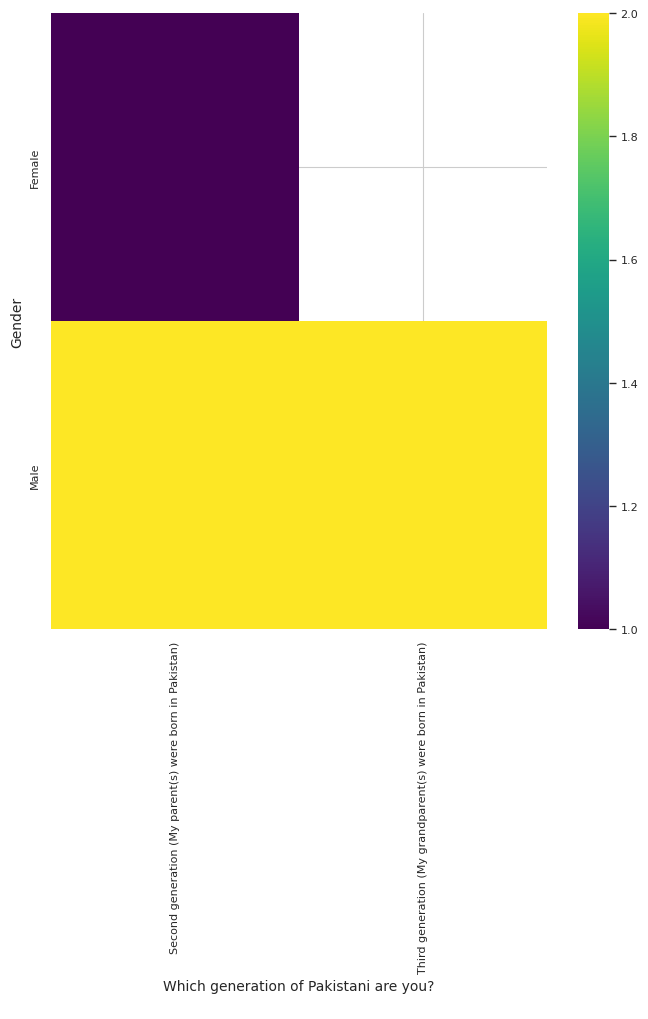

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in _df_16.groupby('Which generation of Pakistani are you?\n')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Which generation of Pakistani are you?\n')
_ = plt.ylabel('Gender')

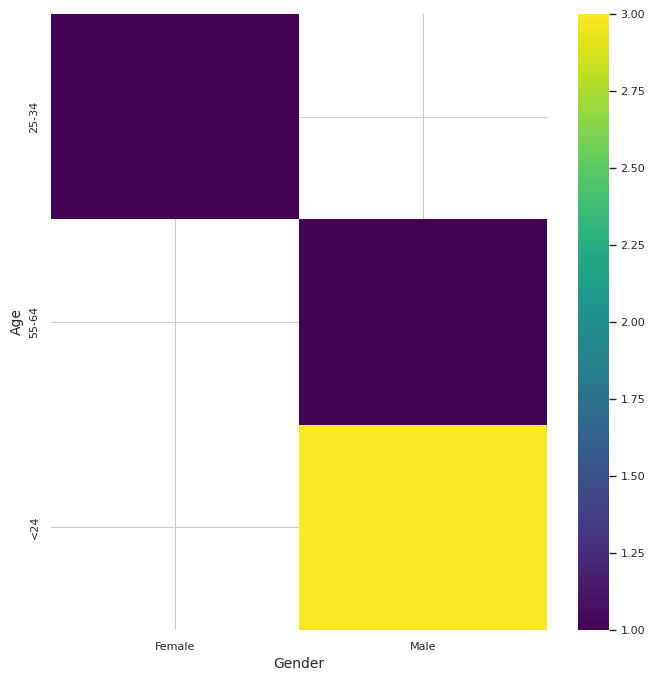

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age'].value_counts()
    for x_label, grp in _df_17.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Age')

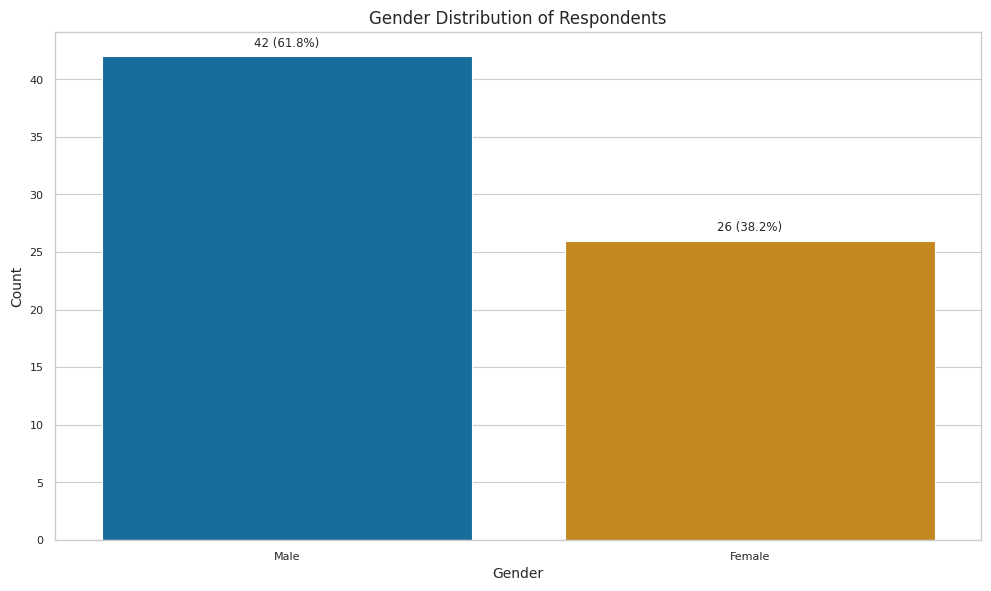

In [ ]:
# Gender Distro of Respondents
total_count = data['Gender'].count()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=data)

plt.title('Gender Distribution of Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

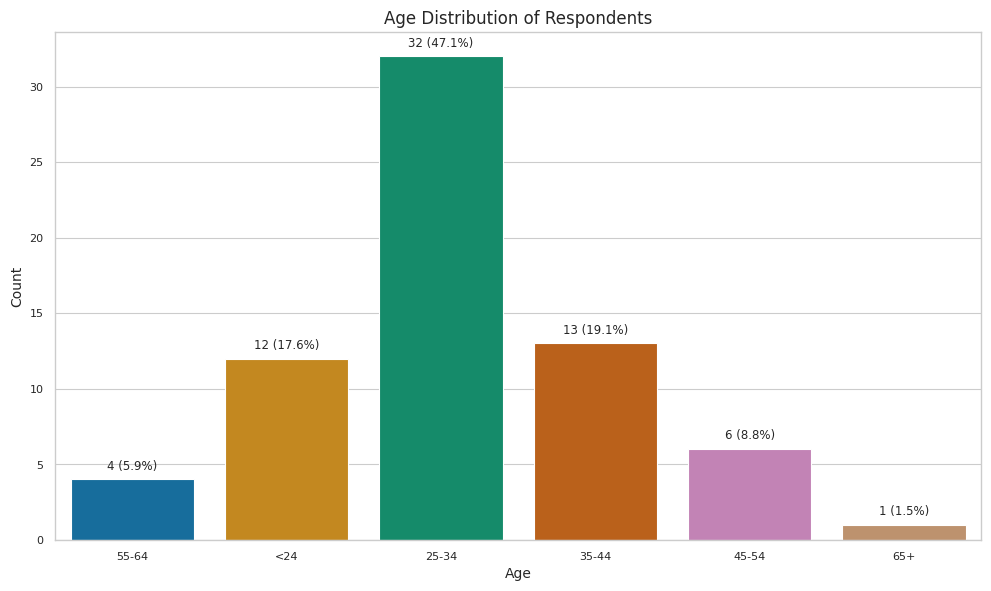

In [ ]:
# Age distribution of Respondents
total_count = data['Age'].count()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age', data=data)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

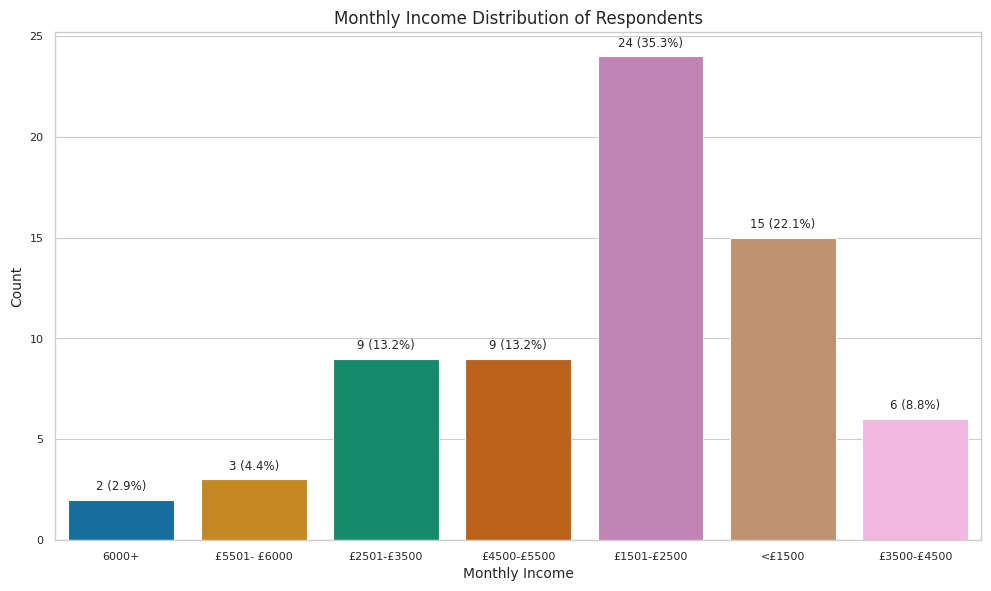

In [ ]:
# '''
# Monthly Income Distro
total_count = data['Monthly income:\n'].count()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Monthly income:\n', data=data)

plt.title('Monthly Income Distribution of Respondents')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

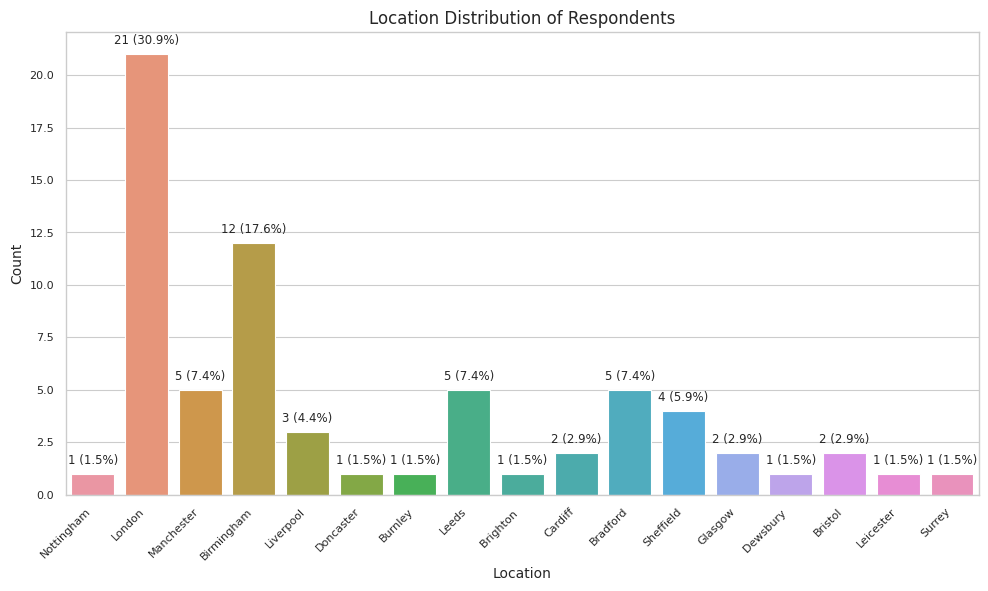

In [ ]:
# Location Distro of Respondents
total_count = data['Where are you based:\n'].count()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Where are you based:\n', data=data)
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label[:12] + '\n' + label[12:] if len(label) > 12 else label for label in labels]
# Set new labels with line breaks
ax.set_xticklabels(new_labels, rotation=15, ha='right')  # Adjust rotation and alignment as needed
plt.title('Location Distribution of Respondents')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8)
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

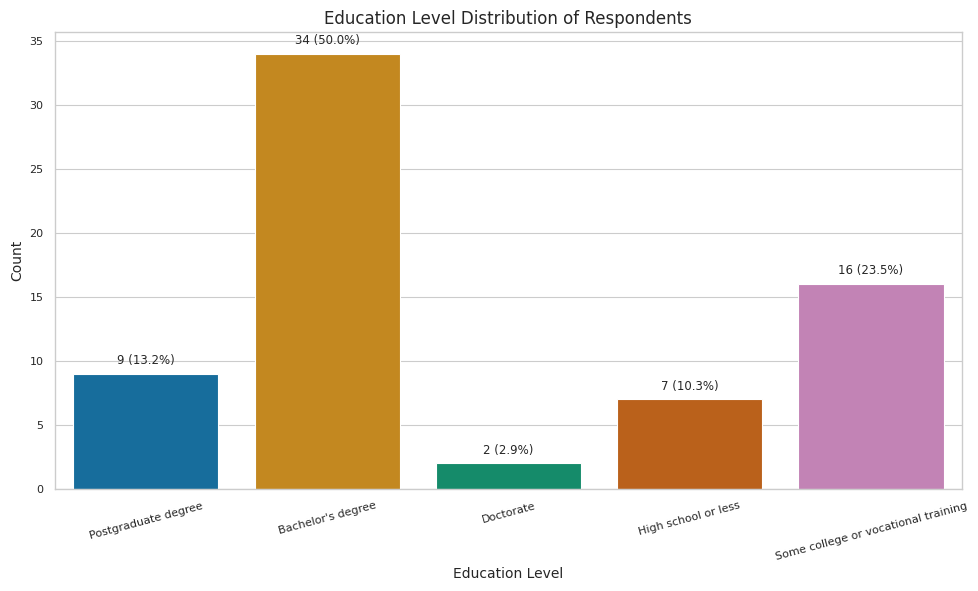

In [ ]:
# Education Level of Respondents
total_count = data['What is your highest level of education?\n'].count()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='What is your highest level of education?\n', data=data)
plt.title('Education Level Distribution of Respondents')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=15, fontsize=8)
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

In [ ]:
# '''
# Profession of Respondents

# data['Monthly income:'] = data['Monthly income:'].astype(str)
# pivot_tableP = data.pivot_table(index='Professions', columns='Average Sadaqah', aggfunc='size', fill_value=0)

total_count = data['Professions'].count()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Professions', data=data)
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label[:12] + '\n' + label[12:] if len(label) > 12 else label for label in labels]
# Set new labels with line breaks
ax.set_xticklabels(new_labels, rotation=90, ha='right')  # Adjust rotation and alignment as needed
plt.title('Profession of Respondents')
plt.xlabel('Professions')
plt.ylabel('Count')
plt.xticks(fontsize=8)
add_value_labels(ax)
plt.tight_layout()
plt.show()

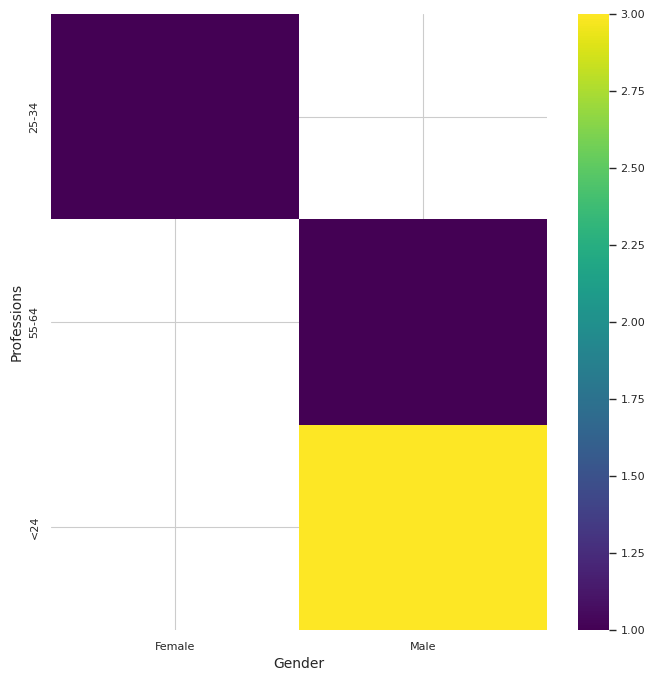

In [ ]:
plt.subplots(figsize=(8, 8))
df_8dhist = pd.DataFrame({
    x_label: grp['Professions'].value_counts()
    for x_label, grp in data.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Professions')

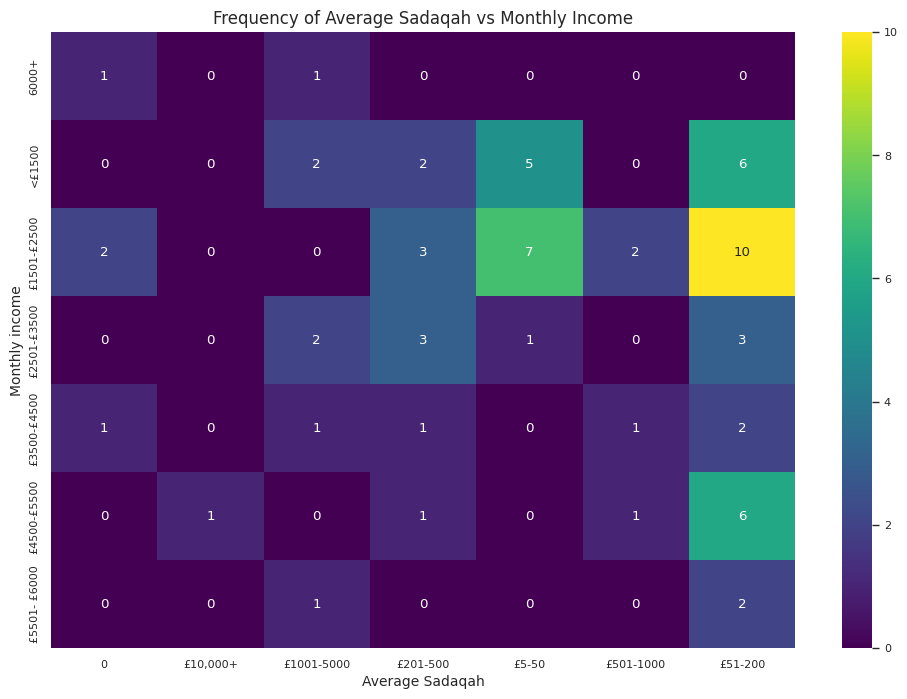

In [ ]:
total_count = data['Monthly income:\n'].count()
data['Monthly income:\n'] = data['Monthly income:\n'].astype(str)
data['Average Sadaqah'] = data['Average Sadaqah'].astype(str)

pivot_tableA = data.pivot_table(index='Monthly income:\n', columns='Average Sadaqah', aggfunc='size', fill_value=0)


# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_tableA, annot=True, cmap='viridis', fmt='d')
plt.title('Frequency of Average Sadaqah vs Monthly Income')
plt.xlabel('Average Sadaqah')
plt.ylabel('Monthly income')
add_value_labels(ax, total_count)
plt.show()




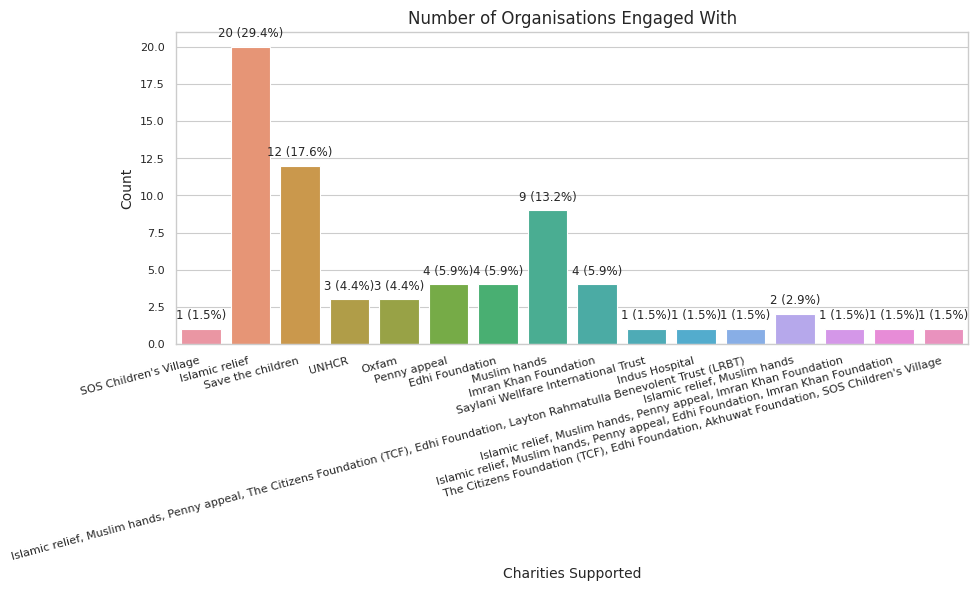

In [ ]:
# Number of Organisations Engaged with by Age Group
# 'Number of Organisations Engaged'

total_count = data['Charities Supported'].count()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Charities Supported', data=data)
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label[:170] + '\n' + label[170:] if len(label) > 170 else label for label in labels]
# Set new labels with line breaks
ax.set_xticklabels(new_labels, rotation=15, ha='right')  # Adjust rotation and alignment as needed
plt.title('Number of Organisations Engaged With')
plt.xlabel('Charities Supported')
plt.ylabel('Count')
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

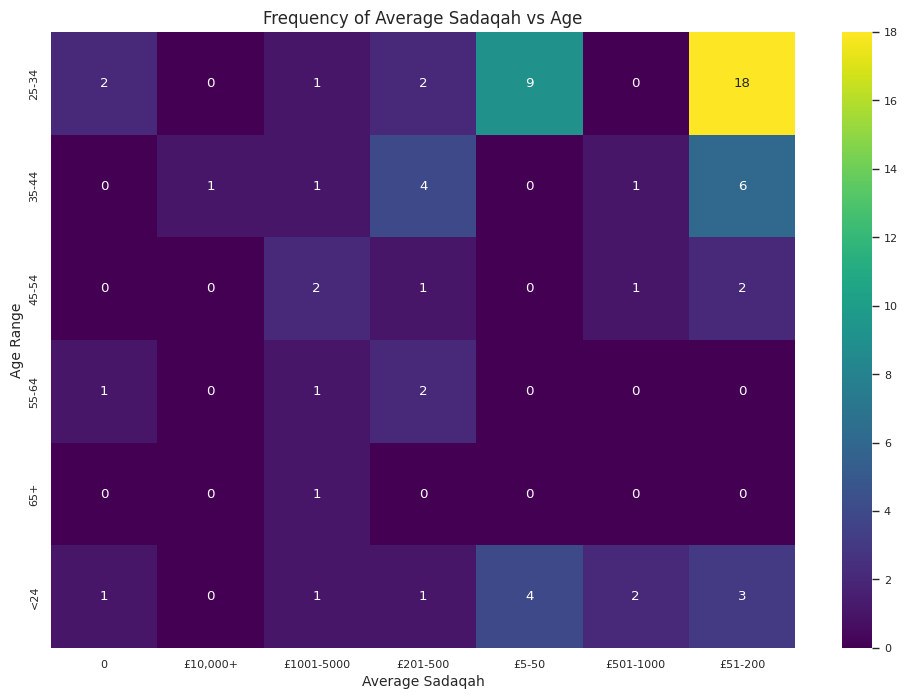

In [ ]:
# Average Sadaqah Donation by Age Group

# First, we process the data to count occurrences of each combination of age and currency range
# Assuming your dataset has columns named 'AgeRange' and 'CurrencyRange'
total_count = data['Age'].count()

data['Age'] = data['Age'].astype(str)
data['Average Sadaqah'] = data['Average Sadaqah'].astype(str)

pivot_tableA = data.pivot_table(index='Age', columns='Average Sadaqah', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_tableA, annot=True, cmap='viridis', fmt='d')
plt.title('Frequency of Average Sadaqah vs Age')
plt.xlabel('Average Sadaqah')
plt.ylabel('Age Range')
add_value_labels(ax, total_count)
plt.show()

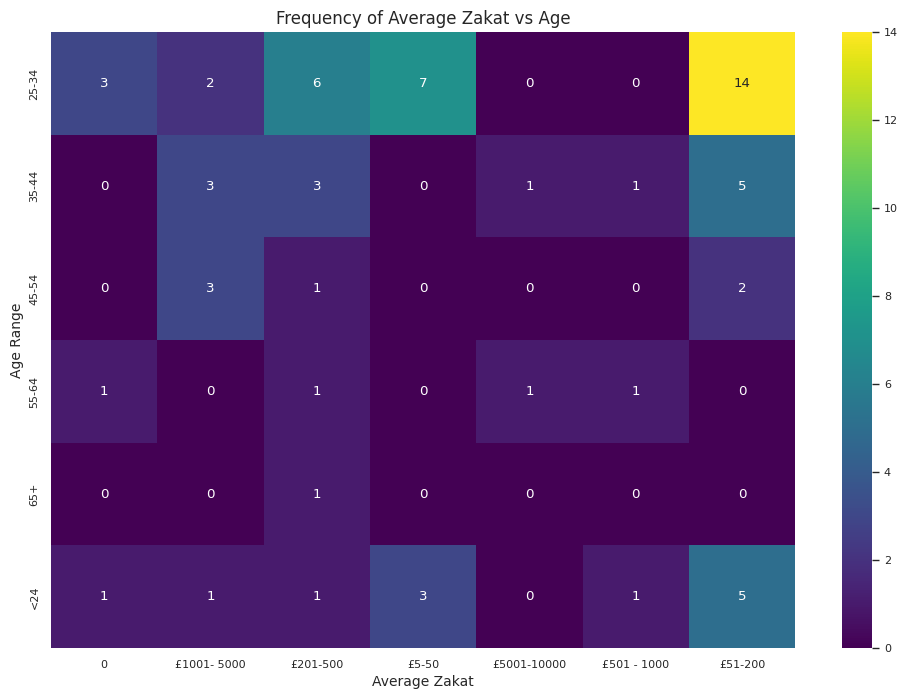

In [ ]:
# Average Zakat Donation by Age Group
total_count = data['Age'].count()
data['Age'] = data['Age'].astype(str)
data['Average Zakat'] = data['Average Zakat'].astype(str)

pivot_tableB = data.pivot_table(index='Age', columns='Average Zakat', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_tableB, annot=True, cmap='viridis', fmt='d')
plt.title('Frequency of Average Zakat vs Age')
plt.xlabel('Average Zakat')
plt.ylabel('Age Range')
add_value_labels(ax, total_count)
plt.show()

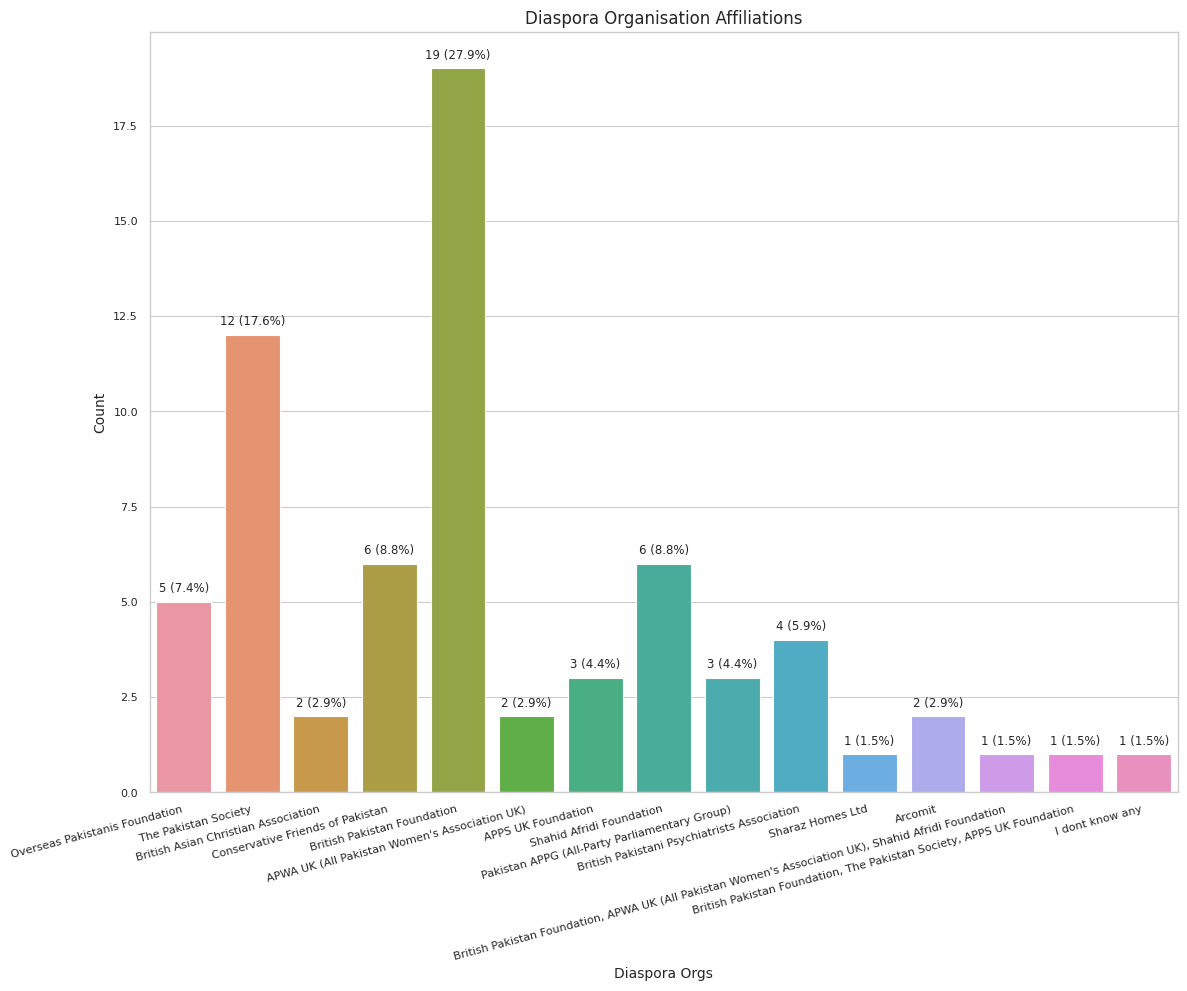

In [ ]:
# Diaspora Organisations in the UK
total_count = data['UK Diaspora Organisations'].count()
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='UK Diaspora Organisations', data=data)
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label[:170] + '\n' + label[170:] if len(label) > 170 else label for label in labels]
# Set new labels with line breaks
ax.set_xticklabels(new_labels, rotation=15, ha='right')  # Adjust rotation and alignment as needed

plt.title('Diaspora Organisation Affiliations')
plt.xlabel('Diaspora Orgs')
plt.ylabel('Count')
plt.xticks(fontsize=8)
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

## **The next plot (below) and immediately prior (above), the labels tell a story but are just really awkward to try and aggregate. I am still trying to play around with the padding of the text to see if it can be optimised even more for readability**

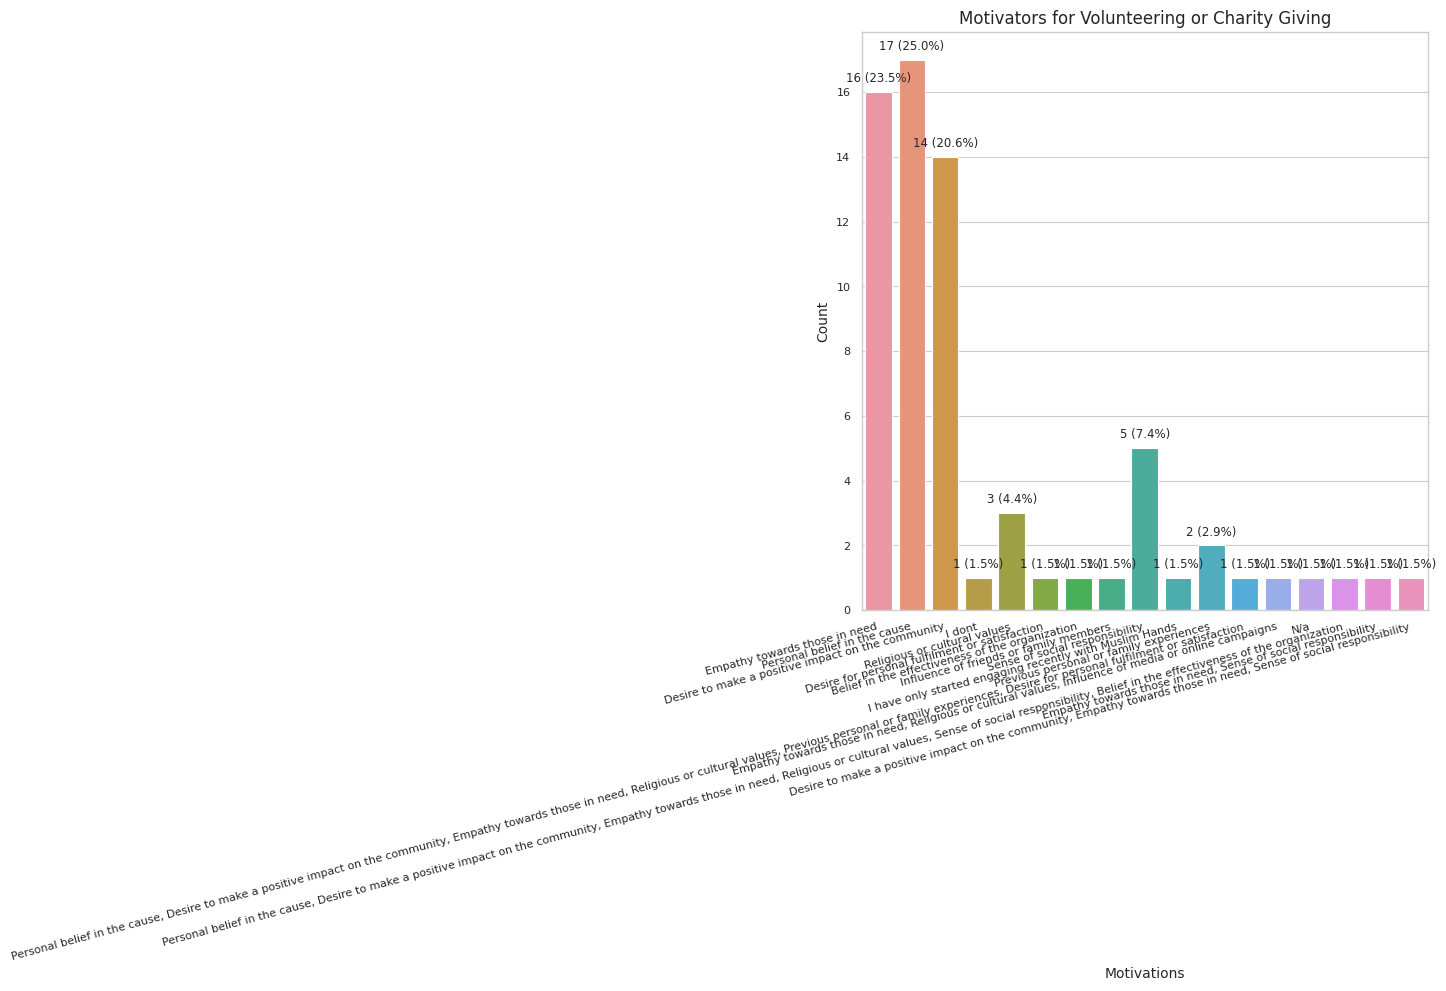

In [ ]:
# Motivations
total_count = data['Motivations'].count()

plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Motivations', data=data)
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label[:3000] + '\n' + label[3000:] if len(label) > 3000 else label for label in labels]
# Set new labels with line breaks
ax.set_xticklabels(new_labels, rotation=15, ha='right')  # Adjust rotation and alignment as needed
plt.title('Motivators for Volunteering or Charity Giving')
plt.xlabel('Motivations')
plt.ylabel('Count')
plt.xticks(fontsize=8)
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

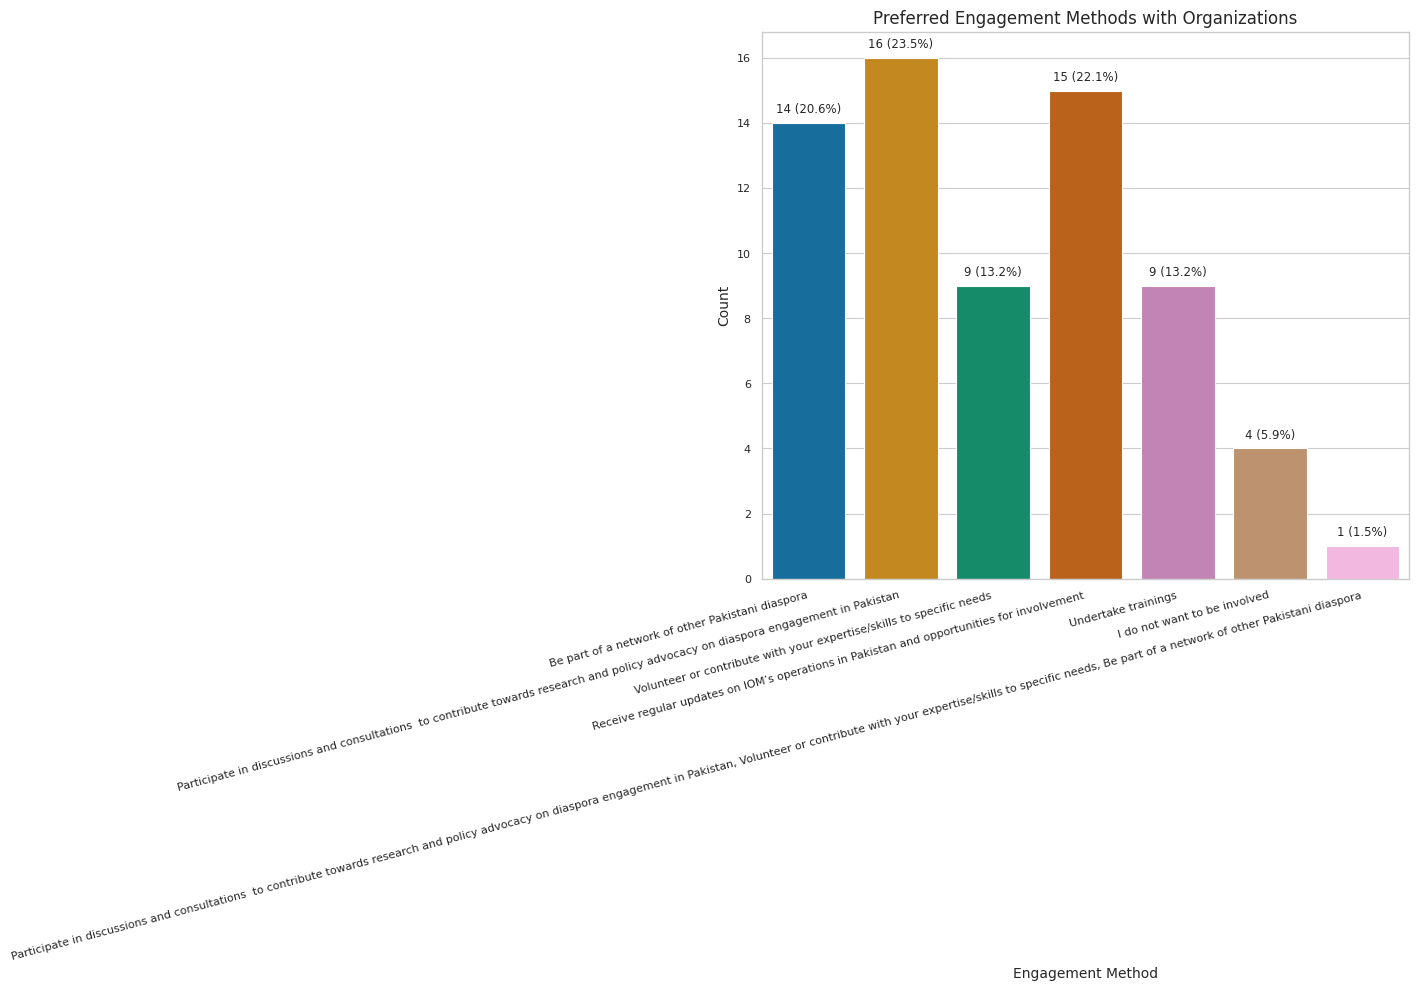

In [ ]:
# Preferred Engagement Methods with Organisations
total_count = data['Engagement Method_IOM'].count()
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Engagement Method_IOM', data=data)
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label[:8000] + '\n' + label[8000:] if len(label) > 8000 else label for label in labels]
# Set new labels with line breaks
ax.set_xticklabels(new_labels, rotation=15, ha='right')  # Adjust rotation and alignment as needed
plt.title('Preferred Engagement Methods with Organizations')
plt.xlabel('Engagement Method')
plt.ylabel('Count')
plt.xticks(fontsize=8)
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

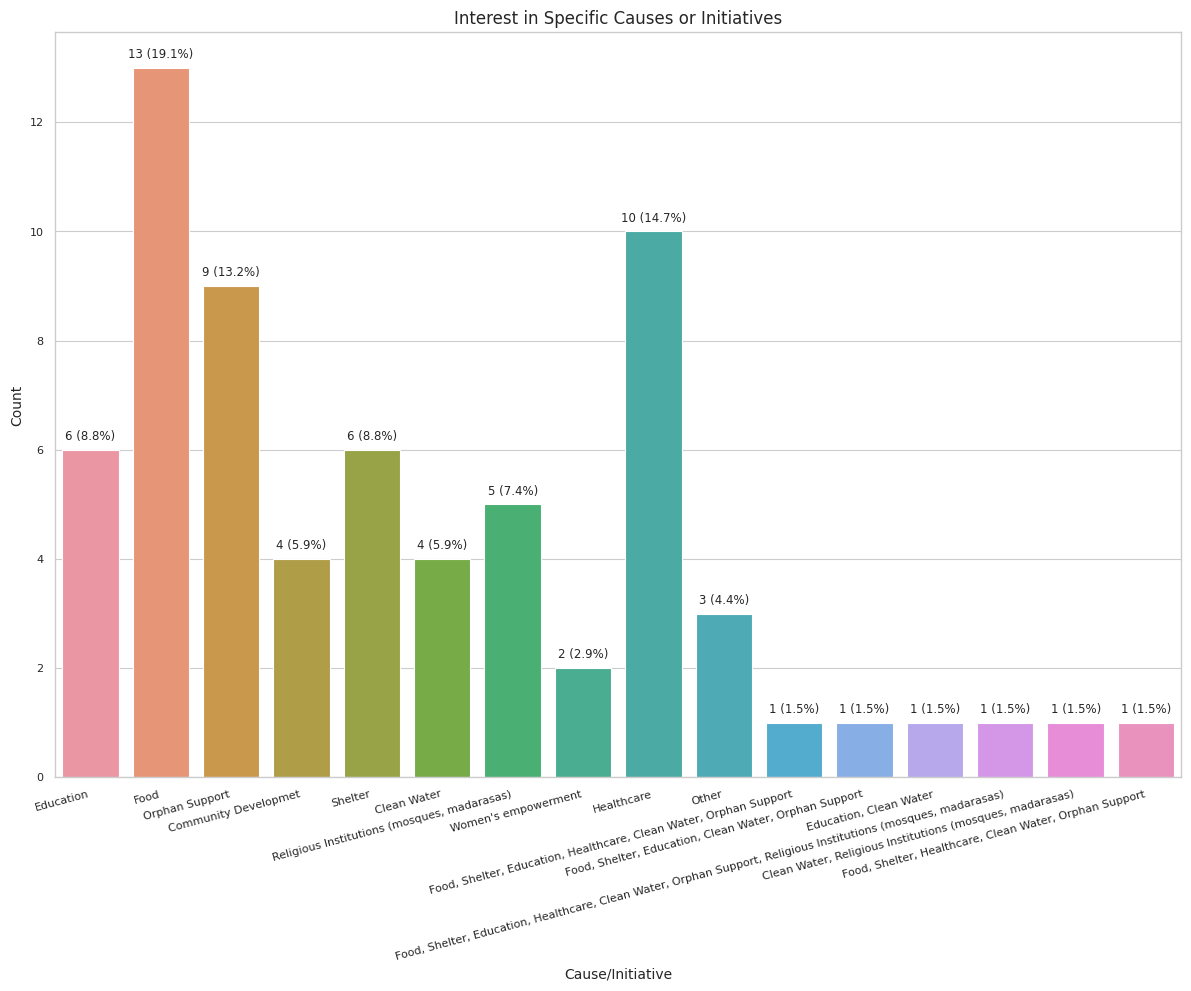

In [ ]:
# Interest in Specific Causes or Initiatives
total_count = data['Causes Supported'].count()

plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Causes Supported', data=data)
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label[:170] + '\n' + label[170:] if len(label) > 170 else label for label in labels]
# Set new labels with line breaks
ax.set_xticklabels(new_labels, rotation=15, ha='right')  # Adjust rotation and alignment as needed
plt.title('Interest in Specific Causes or Initiatives')
plt.xlabel('Cause/Initiative')
plt.ylabel('Count')
plt.xticks(fontsize=8)
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

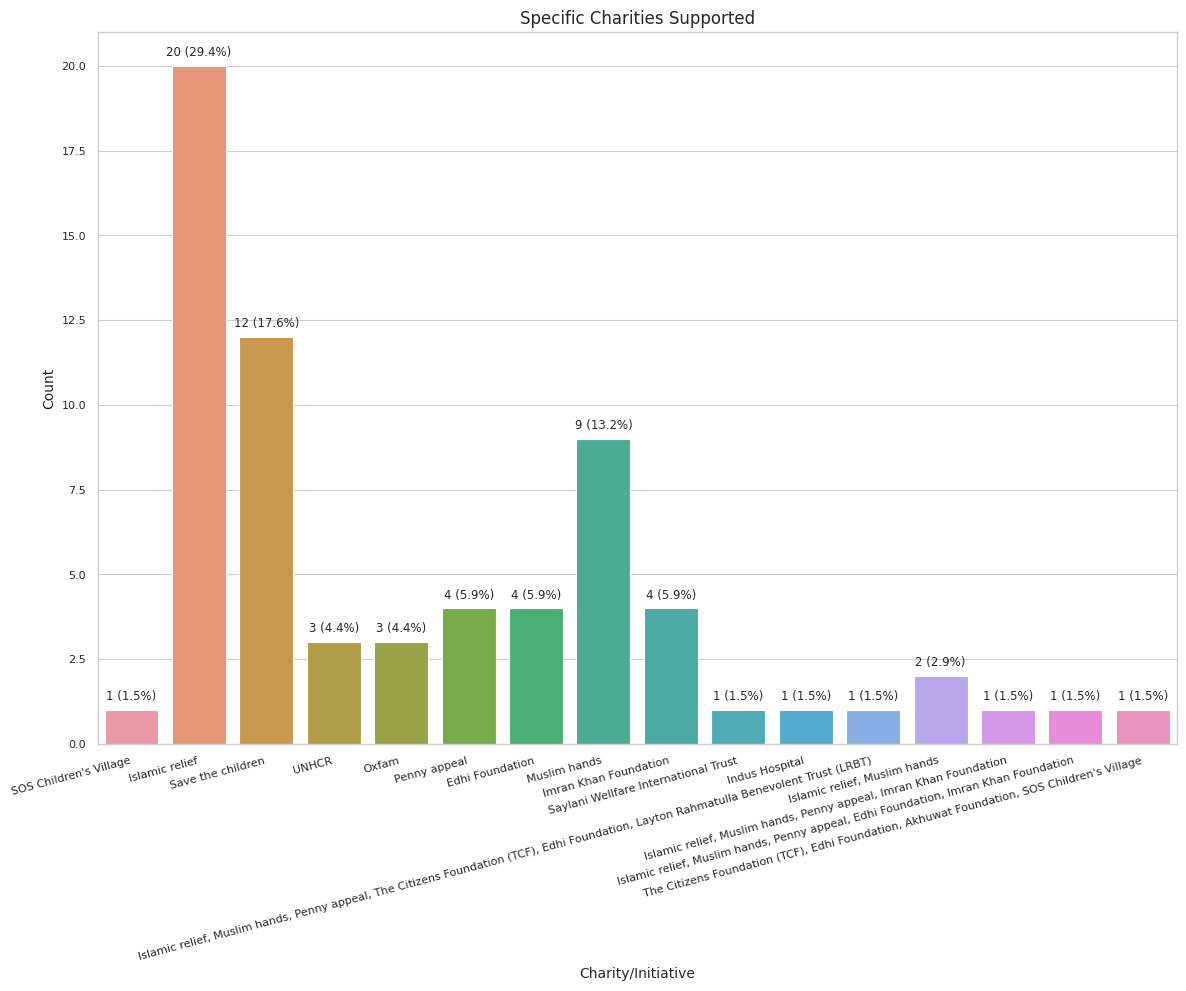

In [ ]:
# Charities Supported
total_count = data['Charities Supported'].count()

plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Charities Supported', data=data)
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label[:170] + '\n' + label[170:] if len(label) > 170 else label for label in labels]
# Set new labels with line breaks
ax.set_xticklabels(new_labels, rotation=15, ha='right')  # Adjust rotation and alignment as needed
plt.title('Specific Charities Supported')
plt.xlabel('Charity/Initiative')
plt.ylabel('Count')
plt.xticks(fontsize=8)
add_value_labels(ax, total_count)
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data = data.dropna()  # Drops all rows with any NaN values

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Grouping the 'Average Sadaqah' values by 'Age'
groups = data.groupby('Monthly income:\n')['Average Sadaqah']

# Preparing separate lists for each age group
group_lists = [group.tolist() for name, group in groups if not group.empty]

# Check there are at least two groups
if len(group_lists) >= 2:
    # Perform the ANOVA test
    anova_result = stats.f_oneway(*group_lists)
    print(f"ANOVA Test: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")
else:
    print("Not enough groups for ANOVA test.")


Not enough groups for ANOVA test.
